In [1]:
import pandas as pd
from IPython.display import display

In [2]:
df = pd.read_csv("cleaned_ebay_deals.csv")

In [3]:
df.head()

,timestamp,title,price,original_price,shipping,url,discount_percentage
0,2025-03-19 06:28:22,"Klipsch R-120SWi 12"" High-Performance Wireless...",159.99,179.99,Free shipping,https://www.ebay.com/itm/365374754988?_trkparm...,11.11
1,2025-03-19 06:28:22,Apple iPhone 14 Pro Max 128GB Network Unlocked...,499.99,1099.00,Free shipping,https://www.ebay.com/itm/365374754988?_trkparm...,54.51
2,2025-03-19 06:28:22,Apple iPhone 14 Pro Max 256GB Unlocked Very Go...,549.99,1199.00,Free shipping,https://www.ebay.com/itm/365374754988?_trkparm...,54.13
3,2025-03-19 06:28:22,Apple iPhone 14 Pro A2650 128GB Network Unlock...,414.99,899.00,Free shipping,https://www.ebay.com/itm/365374754988?_trkparm...,53.84
4,2025-03-19 06:28:22,Apple iPhone 14 128GB Network Unlocked Very Go...,305.99,749.00,Free shipping,https://www.ebay.com/itm/365374754988?_trkparm...,59.15


In [4]:
df.dropna(subset=['price', 'original_price', 'shipping', 'discount_percentage'], inplace=True)


In [5]:
df.head()

,timestamp,title,price,original_price,shipping,url,discount_percentage
0,2025-03-19 06:28:22,"Klipsch R-120SWi 12"" High-Performance Wireless...",159.99,179.99,Free shipping,https://www.ebay.com/itm/365374754988?_trkparm...,11.11
1,2025-03-19 06:28:22,Apple iPhone 14 Pro Max 128GB Network Unlocked...,499.99,1099.00,Free shipping,https://www.ebay.com/itm/365374754988?_trkparm...,54.51
2,2025-03-19 06:28:22,Apple iPhone 14 Pro Max 256GB Unlocked Very Go...,549.99,1199.00,Free shipping,https://www.ebay.com/itm/365374754988?_trkparm...,54.13
3,2025-03-19 06:28:22,Apple iPhone 14 Pro A2650 128GB Network Unlock...,414.99,899.00,Free shipping,https://www.ebay.com/itm/365374754988?_trkparm...,53.84
4,2025-03-19 06:28:22,Apple iPhone 14 128GB Network Unlocked Very Go...,305.99,749.00,Free shipping,https://www.ebay.com/itm/365374754988?_trkparm...,59.15


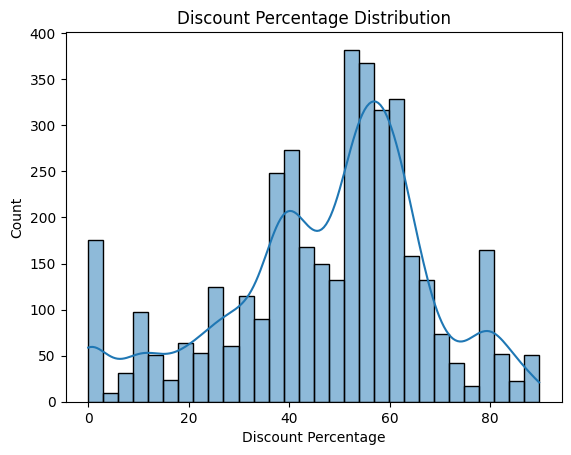

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['discount_percentage'], bins=30, kde=True)
plt.title('Discount Percentage Distribution')
plt.xlabel('Discount Percentage')
plt.ylabel('Count')
plt.show()


In [7]:
def categorize_discount(p):
    if p <= 10:
        return 'Low'
    elif p <= 30:
        return 'Medium'
    else:
        return 'High'

df['discount_bin'] = df['discount_percentage'].apply(categorize_discount)


In [8]:
print(df['discount_bin'].value_counts())

discount_bin
High      3226
Medium     488
Low        261
Name: count, dtype: int64


In [9]:
from sklearn.utils import resample

low = df[df['discount_bin'] == 'Low']
medium = df[df['discount_bin'] == 'Medium']
high = df[df['discount_bin'] == 'High']

min_size = min(len(low), len(medium), len(high))

low_sample = resample(low, replace=False, n_samples=min_size, random_state=42)
medium_sample = resample(medium, replace=False, n_samples=min_size, random_state=42)
high_sample = resample(high, replace=False, n_samples=min_size, random_state=42)

df_balanced = pd.concat([low_sample, medium_sample, high_sample])



In [10]:
print(len(df_balanced))

783


In [11]:
df_balanced.drop(columns='discount_bin', inplace=True)

In [12]:
df_balanced.head()

,timestamp,title,price,original_price,shipping,url,discount_percentage
502,2025-03-22 15:24:04,DJI Avata 2 Fly More Goggles N3 Vlogger Bundle...,1309.00,1309.00,Shipping info unavailable,https://www.ebay.com/itm/156512158074?_trkparm...,0.00
2212,2025-03-30 18:29:59,"Apple MacBook Pro 13"" Late 2020 M1 1TB SSD 16G...",649.99,649.99,Shipping info unavailable,https://www.ebay.com/itm/403999454004?_trkparm...,0.00
2540,2025-04-01 03:44:41,Autotek TA-2055.2 2000W 2-Channel Car Amplifie...,59.99,59.99,Free shipping,https://www.ebay.com/itm/167017920150?_trkparm...,0.00
1160,2025-03-26 06:33:26,"Apple MacBook Pro 13"" Late 2020 M1 1TB SSD 16G...",649.99,649.99,Shipping info unavailable,https://www.ebay.com/itm/146460265518?_trkparm...,0.00
2340,2025-03-31 09:26:50,Seagate Exos 24TB SATA HDD ST24000NM000C 7.2K ...,271.99,299.99,Shipping info unavailable,https://www.ebay.com/itm/403999454004?_trkparm...,9.33


In [13]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df_balanced['shipping'] = encoder.fit_transform(df_balanced['shipping'])


In [14]:
df_balanced.head()

,timestamp,title,price,original_price,shipping,url,discount_percentage
502,2025-03-22 15:24:04,DJI Avata 2 Fly More Goggles N3 Vlogger Bundle...,1309.00,1309.00,1,https://www.ebay.com/itm/156512158074?_trkparm...,0.00
2212,2025-03-30 18:29:59,"Apple MacBook Pro 13"" Late 2020 M1 1TB SSD 16G...",649.99,649.99,1,https://www.ebay.com/itm/403999454004?_trkparm...,0.00
2540,2025-04-01 03:44:41,Autotek TA-2055.2 2000W 2-Channel Car Amplifie...,59.99,59.99,0,https://www.ebay.com/itm/167017920150?_trkparm...,0.00
1160,2025-03-26 06:33:26,"Apple MacBook Pro 13"" Late 2020 M1 1TB SSD 16G...",649.99,649.99,1,https://www.ebay.com/itm/146460265518?_trkparm...,0.00
2340,2025-03-31 09:26:50,Seagate Exos 24TB SATA HDD ST24000NM000C 7.2K ...,271.99,299.99,1,https://www.ebay.com/itm/403999454004?_trkparm...,9.33


In [15]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783 entries, 502 to 1836
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            783 non-null    object 
 1   title                783 non-null    object 
 2   price                783 non-null    float64
 3   original_price       783 non-null    float64
 4   shipping             783 non-null    int64  
 5   url                  783 non-null    object 
 6   discount_percentage  783 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 48.9+ KB


In [16]:

X = df_balanced[['price', 'original_price', 'shipping']]
y = df_balanced['discount_percentage']


In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783 entries, 502 to 1836
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           783 non-null    float64
 1   original_price  783 non-null    float64
 2   shipping        783 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 24.5 KB


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [19]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [20]:
y_pred = model.predict(X_test)

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"{'Metric':<10} {'Value'}")
print(f"{'-'*22}")
print(f"{'MAE':<10} {mae}")
print(f"{'MSE':<10} {mse}")
print(f"{'RMSE':<10} {rmse}")
print(f"{'R²':<10} {r2}")


Metric     Value
----------------------
MAE        11.57668953133974
MSE        222.24431509659286
RMSE       14.907860849115572
R²         0.5807530206277446


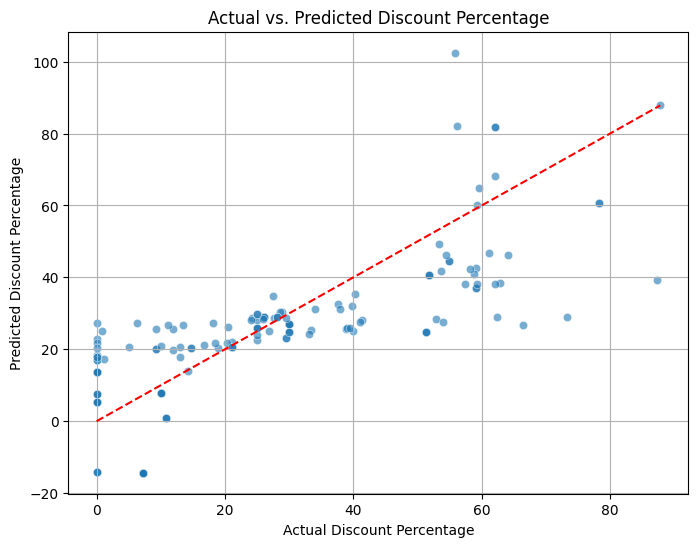

In [22]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel('Actual Discount Percentage')
plt.ylabel('Predicted Discount Percentage')
plt.title('Actual vs. Predicted Discount Percentage')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.grid(True)
plt.show()


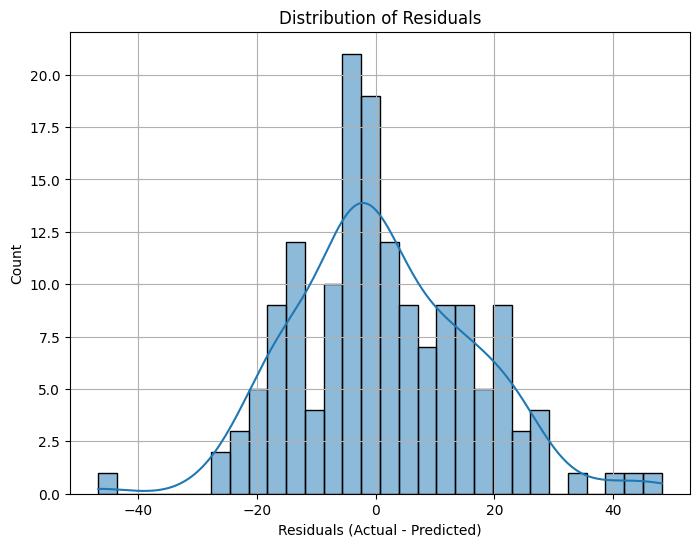

In [23]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals (Actual - Predicted)')
plt.grid(True)
plt.show()


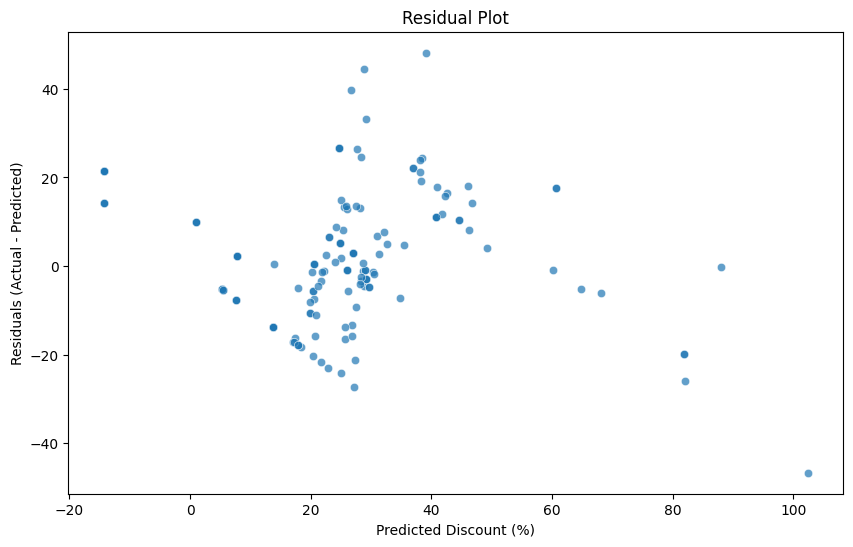

In [24]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.7)
plt.xlabel('Predicted Discount (%)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.show()

In [25]:
df_incomplete = df_balanced.copy()
df_incomplete = df_incomplete.drop(columns=['discount_percentage'])

In [26]:
sample_20 = df_incomplete.sample(n=20, random_state=42)
columns_to_keep = ['price', 'original_price'] + [col for col in df_incomplete.columns if col.startswith('shipping')]
if 'title' in df_incomplete.columns:
    columns_to_keep.insert(0, 'title')

sample_20 = sample_20[columns_to_keep]

In [27]:
predictions = model.predict(sample_20.drop(columns=['title']) if 'title' in sample_20.columns else sample_20)

In [28]:
sample_20['Predicted Discount (%)'] = predictions.round(2)

display_columns = ['title', 'price', 'original_price'] + \
                  [col for col in sample_20.columns if col.startswith('shipping')] + \
                  ['Predicted Discount (%)']

result_table = sample_20[display_columns]
print(result_table.to_string(index=False))


                                                                           title   price  original_price  shipping  Predicted Discount (%)
                      Apple iPhone 14 Pro Max 256GB Unlocked Very Good Condition  539.99         1199.00         1                   44.57
     Sony WF-1000XM5 Truly Wireless Bluetooth Noise Canceling Headphones - Black  112.99          299.99         1                   29.10
    Panasonic Lumix G9 II Mirrorless Black Camera with 12 to 60mm f2.8 to 4 Lens 1799.99         1999.99         1                    7.80
         MSI G32C4XS 31.5" FHD Curved Gaming Monitor, 250Hz/1ms 3000:1 HDR Ready  149.99          199.99         1                   22.53
                     Apple iPhone 12 Pro Max A2342 128GB Unlocked Good Condition  387.95          392.71         1                   17.43
Lenovo Legion Pro 7 16IRX9H 16" WQXGA 240Hz i9-14900HX 32GB 2TB W11P RTX 4080 2Y 1999.00         2665.00         1                   25.95
     Logitech - Z407 2.1 Bl